In [9]:
from pandas import json_normalize
import pandas as pd
import json
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from tqdm.notebook import tqdm

def flattened_idx_to_layer_head(flattened_idx, num_heads):
    return flattened_idx // num_heads, flattened_idx % num_heads

def layer_head_to_flattened_idx(layer, head, num_heads):
    return layer * num_heads + head

### analyze bulk results

In [37]:
results = pd.read_json("../intervention_results/refusal_data/bulk_results/overall_results.json")

In [38]:
import pandas as pd 
from tqdm.notebook import tqdm

results_predict = []
for row in tqdm(results.iterrows()):

    alpha = int(row[1]["alpha"])
    layer = int(row[1]["layer"])
    head = int(row[1]["head"])
    file_name = f"../intervention_results/refusal_data/bulk_results/results_test_openchat_intervention_no_train_{str(alpha)}_{str(layer)}_{str(head)}_fold_0.json"
    
    temp = pd.read_json(file_name)
    value_counts = temp.final_answer.value_counts().to_dict()
    value_counts['alpha'] = alpha
    value_counts['layer'] = layer
    value_counts['head'] = head

    results_predict.append(value_counts)
    

0it [00:00, ?it/s]

In [29]:
results_predict_df = pd.DataFrame(results_predict)
results_merged = pd.merge(results, results_predict_df, on=['alpha', 'layer', 'head'])

In [5]:
#results_predict_df[]

In [39]:
results_merged.describe()

,true,false,alpha,layer,head,(B),(A),undefined
count,717.000000,721.000000,721.000000,721.000000,721.000000,717.000000,716.000000,45.000000
mean,38.372385,11.840499,46.539528,14.113731,15.300971,29.384937,20.414804,8.088889
std,3.719114,4.678654,18.134954,4.584193,9.249001,3.494560,3.013676,14.051564
min,8.000000,3.000000,35.000000,0.000000,0.000000,1.000000,2.000000,1.000000
25%,38.000000,10.000000,35.000000,10.000000,7.000000,29.000000,19.000000,1.000000
50%,39.000000,11.000000,35.000000,13.000000,15.000000,30.000000,20.000000,2.000000
75%,40.000000,12.000000,75.000000,18.000000,23.000000,31.000000,21.000000,7.000000
max,47.000000,50.000000,75.000000,23.000000,31.000000,50.000000,48.000000,50.000000


In [12]:
results_merged[results_merged.true > 42]

,true,false,alpha,layer,head,(B),(A),undefined
113,43.0,7,35,11,16,17.0,33.0,NaN
130,43.0,7,35,12,1,27.0,23.0,NaN
171,46.0,4,35,13,10,24.0,26.0,NaN
616,44.0,6,75,11,7,22.0,28.0,NaN
642,47.0,3,75,12,1,25.0,25.0,NaN
646,43.0,7,75,12,5,25.0,25.0,NaN
661,44.0,6,75,12,20,26.0,24.0,NaN
691,44.0,6,75,13,18,26.0,24.0,NaN


In [7]:
results_merged['undefined'] = results_merged['undefined'].fillna(0)
results_merged[(results_merged.true < 30) & (results_merged.undefined < 2)]

,true,false,alpha,layer,head,(B),(A),undefined
148,27.0,23,35,12,19,5.0,45.0,0.0
192,25.0,25,35,13,31,23.0,27.0,0.0
239,26.0,24,35,15,14,34.0,16.0,0.0
612,26.0,24,75,11,3,2.0,48.0,0.0
641,8.0,42,75,12,0,28.0,22.0,0.0
651,28.0,22,75,12,10,20.0,29.0,1.0
677,24.0,26,75,13,4,50.0,NaN,0.0
682,20.0,30,75,13,9,12.0,38.0,0.0
710,28.0,22,75,14,5,29.0,20.0,1.0
716,29.0,21,75,14,11,31.0,19.0,0.0


In [20]:
#results_merged['undefined'] = results_merged['undefined'].fillna(0)
results_merged[(results_merged.layer == 14) & (results_merged['head'] == 27)]

,true,false,alpha,layer,head,(B),(A),undefined
220,31.0,19,35,14,27,37.0,12.0,1.0


In [31]:
#results_merged['undefined'] = results_merged['undefined'].fillna(0)
results_merged[(results_merged.layer == 14) & (results_merged['head'] == 12)]

,true,false,alpha,layer,head,(B),(A),undefined
205,35.0,15,35,14,12,29.0,21.0,NaN
717,32.0,18,75,14,12,26.0,24.0,NaN


In [32]:
#results_merged['undefined'] = results_merged['undefined'].fillna(0)
results_merged[(results_merged.layer == 12) & (results_merged['head'] == 10)]

,true,false,alpha,layer,head,(B),(A),undefined
139,34.0,16,35,12,10,26.0,24.0,NaN
651,28.0,22,75,12,10,20.0,29.0,1.0


In [33]:
#results_merged['undefined'] = results_merged['undefined'].fillna(0)
results_merged[(results_merged.layer == 12) & (results_merged['head'] == 20)]

,true,false,alpha,layer,head,(B),(A),undefined
149,40.0,10,35,12,20,30.0,20.0,NaN
661,44.0,6,75,12,20,26.0,24.0,NaN


In [34]:
#results_merged['undefined'] = results_merged['undefined'].fillna(0)
results_merged[(results_merged.layer == 12) & (results_merged['head'] == 6)]

,true,false,alpha,layer,head,(B),(A),undefined
135,40.0,10,35,12,6,30.0,20.0,NaN
647,40.0,10,75,12,6,30.0,20.0,NaN


In [21]:
results_merged.describe()

,true,false,alpha,layer,head,(B),(A),undefined
count,717.000000,721.000000,721.000000,721.000000,721.000000,717.000000,716.000000,721.000000
mean,38.372385,11.840499,46.539528,14.113731,15.300971,29.384937,20.414804,0.504854
std,3.719114,4.678654,18.134954,4.584193,9.249001,3.494560,3.013676,3.987521
min,8.000000,3.000000,35.000000,0.000000,0.000000,1.000000,2.000000,0.000000
25%,38.000000,10.000000,35.000000,10.000000,7.000000,29.000000,19.000000,0.000000
50%,39.000000,11.000000,35.000000,13.000000,15.000000,30.000000,20.000000,0.000000
75%,40.000000,12.000000,75.000000,18.000000,23.000000,31.000000,21.000000,0.000000
max,47.000000,50.000000,75.000000,23.000000,31.000000,50.000000,48.000000,50.000000


In [15]:
results_merged.head()

,true,false,alpha,layer,head,(B),(A),undefined
0,40.0,10,35,0,0,30.0,20.0,0.0
1,39.0,11,35,8,0,29.0,21.0,0.0
2,40.0,10,35,8,1,30.0,20.0,0.0
3,39.0,11,35,8,2,29.0,21.0,0.0
4,40.0,10,35,8,3,30.0,20.0,0.0


In [4]:
results[results.true > 42]

,true,false,alpha,layer,head
113,43.0,7,35,11,16
130,43.0,7,35,12,1
171,46.0,4,35,13,10
616,44.0,6,75,11,7
642,47.0,3,75,12,1
646,43.0,7,75,12,5
661,44.0,6,75,12,20
691,44.0,6,75,13,18


In [6]:
df = pd.read_json("./intervention_results/refusal_data/bulk_results/results_test_openchat_intervention_no_train_75_13_10_fold_0.json")
df.predict.value_counts()

predict
True     42
False     8
Name: count, dtype: int64

In [ ]:
df = pd.read_json("./intervention_results/refusal_data/bulk_results/results_test_openchat_intervention_no_train_75_13_10_fold_0.json")
df.predict.value_counts

In [1]:
#13	31
import pandas as pd
df = pd.read_json("./intervention_results/refusal_data/bulk_results/results_test_openchat_intervention_no_train_35_10_29_fold_0.json")
df.final_answer.value_counts()#.predict#.value_counts()

final_answer
(A)          21
(B)          16
undefined    13
Name: count, dtype: int64

In [14]:
#13	31
df = pd.read_json("./intervention_results/refusal_data/bulk_results/results_test_openchat_intervention_no_train_75_12_1_fold_0.json")
df.final_answer.value_counts()#.predict#.value_counts()

final_answer
(B)    25
(A)    25
Name: count, dtype: int64

In [15]:
#13	31
df = pd.read_json("./intervention_results/refusal_data/bulk_results/results_test_openchat_intervention_no_train_75_12_1_fold_0.json")
df.predict.value_counts()

predict
True     47
False     3
Name: count, dtype: int64

In [1]:
#df

In [7]:
results[results.false > 26]

,true,false,alpha,layer,head
129,23.0,27,35,12,0
170,23.0,27,35,13,9
177,23.0,27,35,13,16
193,17.0,33,35,14,0
211,21.0,29,35,14,18
606,NaN,50,75,10,29
615,9.0,41,75,11,6
625,21.0,29,75,11,16
631,NaN,50,75,11,22
641,8.0,42,75,12,0


### Analyze attention heads 

In [6]:
import pandas as pd
df = pd.read_json("../datasets/refusal/dataset_processed_attentions.json")
#df.reset_index(drop=True, inplace=True)
#correct = [0 if value == "yes" else 1 for value in df.predict.values]
#df.correct = correct

In [20]:
from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def train_probes(seed, train_set_idxs, val_set_idxs, separated_head_wise_activations, separated_labels, num_layers, num_heads,c=100, dim_reduction=False):
    
    all_head_accs = []
    probes = []
    train_accs = []
    all_X_train = np.concatenate([separated_head_wise_activations[i] for i in train_set_idxs], axis = 0)
    print(all_X_train.shape)
    all_X_val = np.concatenate([separated_head_wise_activations[i] for i in val_set_idxs], axis = 0)
    y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
    print(y_train.shape)
    y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)

    for layer in tqdm(range(num_layers)): 
        for head in range(num_heads): 
            
            X_train = all_X_train[:,layer,head,:]
            
            dim_reduction = PCA(n_components = 2).fit(X_train)
            X_train_transform = dim_reduction.transform(X_train)
            X_val = all_X_val[:,layer,head,:]
            X_val_transform = dim_reduction.transform(X_val)
            
            #### CAREFUL PCA IS ON
            if dim_reduction: 
                X_train = X_train_transform
                X_val = X_val_transform
        
            if c == None: 
                clf = LogisticRegression(random_state=seed, max_iter=10000).fit(X_train, y_train)
            
            else:
                #print(c)
                clf = LogisticRegression(random_state=seed, C=c, penalty='elasticnet', l1_ratio= 0.5, max_iter=10000, solver='saga', tol= 10e-5).fit(X_train, y_train) #, penalty='l1', , C=100000
            
            y_pred = clf.predict(X_train)
            train_accs.append(accuracy_score(y_train, y_pred))
            y_val_pred = clf.predict(X_val)
            all_head_accs.append(accuracy_score(y_val, y_val_pred))

            probes.append(clf)

    all_head_accs_np = np.array(all_head_accs)
    train_accs_np = np.array(train_accs)
    return probes, all_head_accs_np, train_accs_np




#### Gridsearch code

In [ ]:

def grid_search(X_train, y_train):

    # Define the grid of hyperparameters to search
    param_grid = {
        'C': [1, 10, 100, 1000],#[0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
        'penalty': ['l2', 'l1'],
        'max_iter': [1000, 5000, 10000]
    }

    # Define the model
    model = LogisticRegression()

    # Setup the grid search
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=0)

    # Perform the grid search
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_, grid_search.best_score_


def train_probes(train_set_idxs, val_set_idxs, separated_head_wise_activations, separated_labels, num_layers, num_heads, rm_outliers=True, reduce_dims=False, seed=22):
    
    all_head_accs = []
    probes = []
    train_accs = []
    all_X_train = np.concatenate([separated_head_wise_activations[i] for i in train_set_idxs], axis = 0)
    print(all_X_train.shape)
    all_X_val = np.concatenate([separated_head_wise_activations[i] for i in val_set_idxs], axis = 0)
    y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
    print(y_train.shape)
    y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)

    for layer in tqdm(range(num_layers)): 
        for head in range(num_heads): 
            
            X_train = all_X_train[:,layer,head,:]
            X_val = all_X_val[:,layer,head,:]
            
            y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
            #print(y_train.shape)
            y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)
            
            dim_reduction = PCA(n_components = 2, random_state= seed).fit(X_train)
            X_train_transform = dim_reduction.transform(X_train)
            X_val_transform = dim_reduction.transform(X_val)
            
            #### CAREFUL PCA IS ON
            if reduce_dims: 
                X_train = X_train_transform
                X_val = X_val_transform
            
            # if rm_outliers:
            #     X_val, y_val = remove_outliers(X_train, X_val, y_val)
            #     X_train, y_train = remove_outliers(X_train, X_train, y_train)
           
            clf, train_acc = grid_search(X_train, y_train)

            y_pred = clf.predict(X_train)
            train_acc = accuracy_score(y_train, y_pred)
            train_accs.append(train_acc)
            y_val_pred = clf.predict(X_val)
        
            all_head_accs.append(accuracy_score(y_val, y_val_pred))

            probes.append(clf)

    all_head_accs_np = np.array(all_head_accs)
    train_accs_np = np.array(train_accs)
    return probes, all_head_accs_np, train_accs_np


#### Probe training

In [21]:
from dataclasses import dataclass
import numpy as np
@dataclass
class Args:
    #model_name: str
    #dataset_name: str
    #activations_dataset: str
    val_ratio: float
    use_center_of_mass: bool
    use_random_dir: bool
    seed: int
    num_heads: int

args = Args(val_ratio=0.5, use_center_of_mass=False, use_random_dir=False, seed=42, num_heads=12)

num_layers =32
num_heads = 32

seed = 42

import numpy as np 

index_dic = {}
separated_activations = []
separated_labels = []
reqs_order = []
id_column = "data_id"
for req_id in df[id_column].unique():

    req_df = df[df[id_column] == req_id].index

    #req_ids.append(req_df)
    index_dic[req_id] = list(req_df)
    
    temp_activations = df[df[id_column] == req_id].attentions
    activations = np.array([list(sample.values()) for sample in temp_activations.values])#.shape
    batch_length = len(temp_activations)
    dim = 128
    activations = np.reshape(activations, (batch_length, 32, 32, dim))

    temp_labels = [1 if label==True else 0 for label in df[df[id_column] == req_id]['correct'].values]
    separated_labels.append(temp_labels)
    separated_activations.append(activations)
    reqs_order.append(req_id)

number_of_examples = np.arange(len(reqs_order))

fold_results = []
fold_probes = []

# get two folds using numpy
num_fold = 1
fold_idxs = np.array_split(number_of_examples, num_fold)
for i in range(len(fold_idxs)):
    print(i)
    if num_fold == 1: 
        train_idxs = np.arange(len(reqs_order))
    else:
        train_idxs = np.concatenate([fold_idxs[j] for j in range(num_fold) if j != i])

    val_ratio = args.val_ratio
    seed = 42  # You can choose your own seed value
    rng = np.random.default_rng(seed)
    size = int(len(train_idxs)*(1-val_ratio))
    #print(size)
    train_set_idxs = rng.choice(train_idxs, size=size, replace=False)
    val_set_idxs = np.array([x for x in train_idxs if x not in train_set_idxs])

    if len(fold_idxs) == 1:
        test_idxs = val_set_idxs
    else:
        test_idxs = fold_idxs[i]

    print(fold_idxs)
    print(train_idxs)
    print("Train indexes:" , train_set_idxs)
    print("Validation indexes: ", val_set_idxs)
    #print(test_idxs)

    # train_index_list = np.concatenate([list(index_dic.values())[i] for i in train_set_idxs], axis = 0)
    # train_set = df.loc[train_index_list]

    # rng = np.random.default_rng(seed)
    val_idxs = val_set_idxs
    probes, all_head_accs_np, train_accs = train_probes(seed, train_set_idxs, val_idxs, separated_activations , separated_labels, num_layers=num_layers, num_heads=num_heads, c=1)
    #probes, all_head_accs_np, train_accs = train_probes(train_set_idxs, val_idxs, separated_activations , separated_labels, num_layers=num_layers, 
    #                                                    num_heads=num_heads, reduce_dims=False)
    
    # fold_probes.append(probes)
    # fold_results.append(all_head_accs_np)

0
[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,

  0%|          | 0/32 [00:00<?, ?it/s]

In [11]:
def calculate_snr(set1, set2):
    # Assuming set1 and set2 are your two classes of data
    mean1 = np.mean(set1, axis=0)
    mean2 = np.mean(set2, axis=0)
    # Between-class variance (squared difference between class means)
    between_class_variance = np.sum((mean1 - mean2) ** 2)
    # Within-class variances (average variance within each class)
    within_class_variance = (np.var(set1, axis=0).mean() + np.var(set2, axis=0).mean()) / 2
    # Ratio similar to Fisher's criterion but without projection
    ratio = between_class_variance / within_class_variance#
    return ratio


def calculate_noise(set1,set2):
    # Within-class variances (average variance within each class)
    within_class_variance = (np.var(set1, axis=0).mean() + np.var(set2, axis=0).mean()) / 2
    #within_class_variance = (np.var(set1, axis=0).mean())#+ np.var(set2, axis=0).mean()) / 2
    return within_class_variance


In [12]:
ratios = []
separated_head_wise_activations = separated_activations

all_X_train = np.concatenate([separated_head_wise_activations[i] for i in train_set_idxs], axis = 0)
print(all_X_train.shape)
all_X_val = np.concatenate([separated_head_wise_activations[i] for i in val_set_idxs], axis = 0)
y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
print(y_train.shape)
y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)

for layer in tqdm(range(num_layers)): 
    for h in range(num_heads): 
            
            label =1
            indexes_yes = np.where(y_train == label)[0]
            ##indexes_val = np.where(y_val == 1)[0]
            #indexes = np.concatenate([indexes_train, indexes_val])
            
            ## needs to be split
            set1 = all_X_train[indexes_yes,layer,h,:]
            
            label =0
            indexes_no = np.where(y_train == label)[0]
            set2 = all_X_train[indexes_no,layer,h,:]

            # # Assuming set1 and set2 are your two classes of data
            # mean1 = np.mean(set1, axis=0)
            # mean2 = np.mean(set2, axis=0)

            # # Between-class variance (squared difference between class means)
            # between_class_variance = np.sum((mean1 - mean2) ** 2)

            # # Within-class variances (average variance within each class)
            # within_class_variance = (np.var(set1, axis=0).mean() + np.var(set2, axis=0).mean()) / 2

            # # Ratio similar to Fisher's criterion but without projection
            # ratio = between_class_variance / within_class_variance

            ratio = calculate_noise(set1,set2)

            ratios.append(ratio)

ratios = np.array(ratios)

(458, 32, 32, 128)
(458,)


  0%|          | 0/32 [00:00<?, ?it/s]

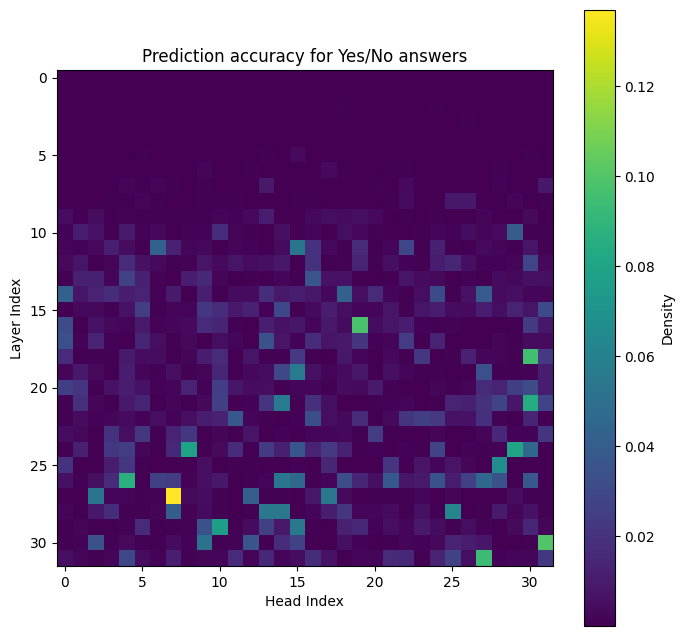

In [12]:
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
#data = np.random.rand(10,10) # Example data

data = ratios.reshape(32,32) # np.random.rand(32, 32)  # Example data

fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(data, cmap='viridis', interpolation='nearest')

# Add a colorbar associated with the Axes object's content
fig.colorbar(cax, ax=ax, label='Density')

# Set titles and labels
ax.set_title('Prediction accuracy for Yes/No answers')
ax.set_xlabel('Head Index')
ax.set_ylabel('Layer Index')

plt.show()

In [15]:
np.argsort(all_head_accs_np)[::-1][0:30]

array([432, 403, 475, 400, 468, 358, 450, 349, 444, 408, 448, 466, 460,
       503, 404, 368, 384, 356, 522, 438, 494, 355, 390, 421, 485, 563,
       374, 472, 409, 394])

In [18]:
variances_for_heads = ratios[np.argsort(all_head_accs_np)[::-1][0:30]]

In [19]:
top_head_indixes = [432, 403, 475, 400, 468, 358, 450, 349, 444, 408, 448, 466, 460,
       503, 404, 368, 384, 356, 522, 438, 494, 355, 390, 421, 485, 563,
       374, 472, 409, 394]

In [21]:
dic_values = {key:value for key, value in zip(top_head_indixes, variances_for_heads)}
#dic_values

In [22]:
sorted_dic = sorted(dic_values.items(), key=lambda item: item[1])

# Convert back to dictionary if needed
#sorted_dict_by_values = dict(sorted_items_by_value)

print(sorted_dic)

[(404, 0.001035891567604411), (384, 0.0032215294529061413), (394, 0.0033722395236531633), (390, 0.003676269188366995), (460, 0.0038175588392194244), (444, 0.003982780910326076), (356, 0.004456778698616871), (503, 0.007505938877808909), (438, 0.00758706336882552), (408, 0.011165543229789316), (355, 0.011314678518711352), (421, 0.011993855816160059), (450, 0.013174805579528655), (403, 0.013401799769432083), (522, 0.014263817750317993), (409, 0.014844747056260455), (468, 0.01627457279821903), (368, 0.019538065478127573), (400, 0.02005865301879995), (563, 0.020429113033948475), (485, 0.024893782444054956), (374, 0.028443557833244155), (494, 0.029715586184872817), (472, 0.03098451444962704), (432, 0.03615301848446846), (475, 0.03952744512304512), (349, 0.03993285507923231), (358, 0.041802534441816), (448, 0.04243434833708511), (466, 0.0426692906697798)]


In [25]:
for item in sorted_dic[0:5]:

    print(flattened_idx_to_layer_head(item[0], 32))

(12, 20)
(12, 0)
(12, 10)
(12, 6)
(14, 12)


In [23]:
# from matplotlib.patches import Rectangle
# from matplotlib import pyplot as plt
# #data = np.random.rand(10,10) # Example data

# data = all_head_accs_np.reshape(32,32) # np.random.rand(32, 32)  # Example data

# fig, ax = plt.subplots(figsize=(8, 8))
# cax = ax.imshow(data, cmap='viridis', interpolation='nearest')

# # Add a colorbar associated with the Axes object's content
# fig.colorbar(cax, ax=ax, label='Density')

# # Set titles and labels
# ax.set_title('Prediction accuracy for Yes/No answers')
# ax.set_xlabel('Head Index')
# ax.set_ylabel('Layer Index')

# plt.show()

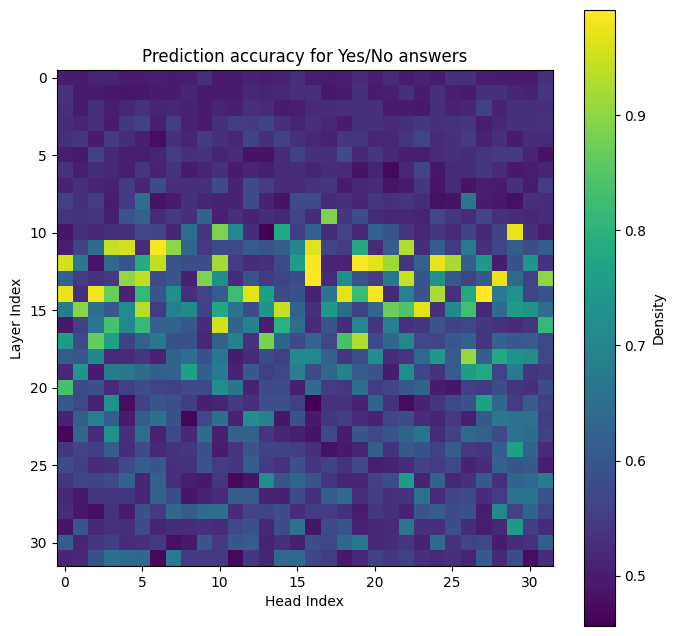

In [8]:
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
#data = np.random.rand(10,10) # Example data

data = all_head_accs_np.reshape(32,32) # np.random.rand(32, 32)  # Example data

fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(data, cmap='viridis', interpolation='nearest')

# Add a colorbar associated with the Axes object's content
fig.colorbar(cax, ax=ax, label='Density')

# Set titles and labels
ax.set_title('Prediction accuracy for Yes/No answers')
ax.set_xlabel('Head Index')
ax.set_ylabel('Layer Index')

plt.show()

In [5]:
def remove_outliers(tuning_data, filter_data, labels):

    # Calculate mean and standard deviation
    means = tuning_data.mean(axis=0)
    stds = tuning_data.std(axis=0)

    # Calculate z-scores
    z_scores = np.abs((filter_data - means) / stds)

    # Set a threshold
    threshold = 4

    # Find where all features have a z-score less than the threshold
    non_outliers = (z_scores < threshold).all(axis=1)

    # Filter out the outliers
    filtered_data = filter_data[non_outliers]
    filter_labels = labels[non_outliers]
    #print(filter_data.shape)
    #print(filter_labels.shape)
    return filtered_data, filter_labels

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the data
scaler = StandardScaler()

all_X_train = np.concatenate([separated_activations[i] for i in train_set_idxs], axis = 0)
#print(all_X_train.shape)
all_X_val = np.concatenate([separated_activations[i] for i in val_set_idxs], axis = 0)
y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
#print(y_train.shape)
y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)
        
X_train = all_X_train[:,layer,h,:]
X_train.shape

X_val = all_X_val[:,layer,h,:]
X_val.shape

ratios = []

for layer in tqdm(range(num_layers)): 
    for h in range(num_heads): 
        
        y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
        #print(y_train.shape)
        y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)
                

        X_train = all_X_train[:,layer,h,:]
        X_train.shape

        X_val = all_X_val[:,layer,h,:]
        X_val.shape

        # scaler = scaler.fit(X_train)
        # X_train = scaler.transform(X_train)
        # X_val = scaler.transform(X_val)


        X_val, y_val = remove_outliers(X_train, X_val, y_val)
        
        X_train, y_train = remove_outliers(X_train, X_train, y_train)

        #cl = TSNE(n_components=2, random_state=args.seed).fit(X_train)
        cl = PCA(n_components=2, random_state=args.seed).fit(X_train)
        X_reduction = cl.transform(X_train)
        X_val_reduction = cl.transform(X_val)
        

        # scaler = scaler.fit(X_reduction)
        # X_reduction = scaler.transform(X_reduction)
        # X_val = scaler.transform(X_val_reduction)

        indexes_val = np.where(y_val == True)[0]
        samples_1 = [X_val_reduction[i] for i in indexes_val]

        indexes_val = np.where(y_val == False)[0]
        samples_2 = [X_val_reduction[i] for i in indexes_val]

        #print(str(head))
        #print(calculate_snr(samples_1, samples_2))
        ratios.append(calculate_snr(samples_1, samples_2))
        #ratios.append(calculate_noise(samples_1, samples_2))

ratios = np.array(ratios)

  0%|          | 0/32 [00:00<?, ?it/s]

0.36599429203747497
0.012216083311654819
2.1050883809965555
2.338643659195111
0.5577845624016775


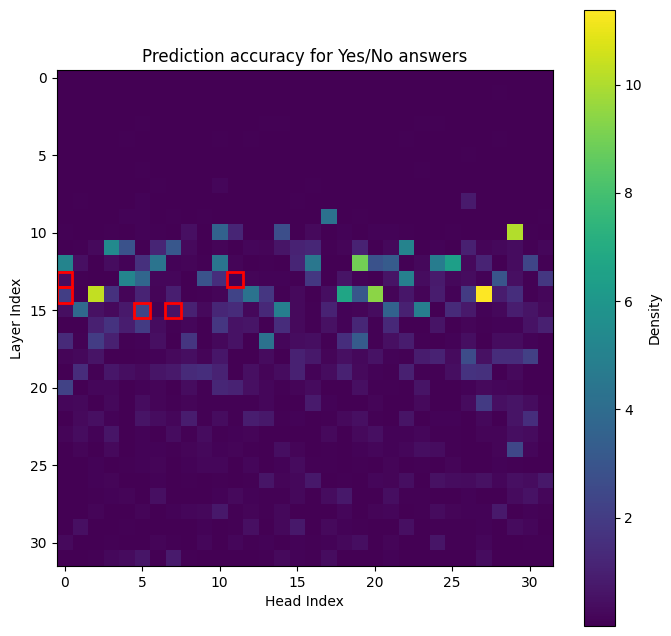

In [16]:
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
#data = np.random.rand(10,10) # Example data

data = ratios.reshape(32,32) # np.random.rand(32, 32)  # Example data

fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(data, cmap='viridis', interpolation='nearest')

heads = [(13, 0), (13, 11), (14, 0), (15, 5), (15, 7)]

#x, y = 5, 5  # for example, highlighting the field at (5, 5)
for head in heads: 
    # Coordinates of the field you want to highlight
    # Note: Matplotlib's coordinate system starts from the top left corner as (0, 0)
    x = head[1]
    y = head[0]
    print(data[head[0], head[1]])
    # Create a rectangle outline
    # Arguments: (x, y) - lower left corner, width, height, edgecolor, and fill
    rect = Rectangle((x-0.5, y-0.5), 1, 1, linewidth=2, edgecolor='r', facecolor='none')

    # Add the rectangle to the Axes
    ax.add_patch(rect)

# Add a colorbar associated with the Axes object's content
fig.colorbar(cax, ax=ax, label='Density')

# Set titles and labels
ax.set_title('Prediction accuracy for Yes/No answers')
ax.set_xlabel('Head Index')
ax.set_ylabel('Layer Index')

plt.show()

### Plot PCA

(12, 6)
Explained Variance Ratio: [0.18763417 0.13519708]


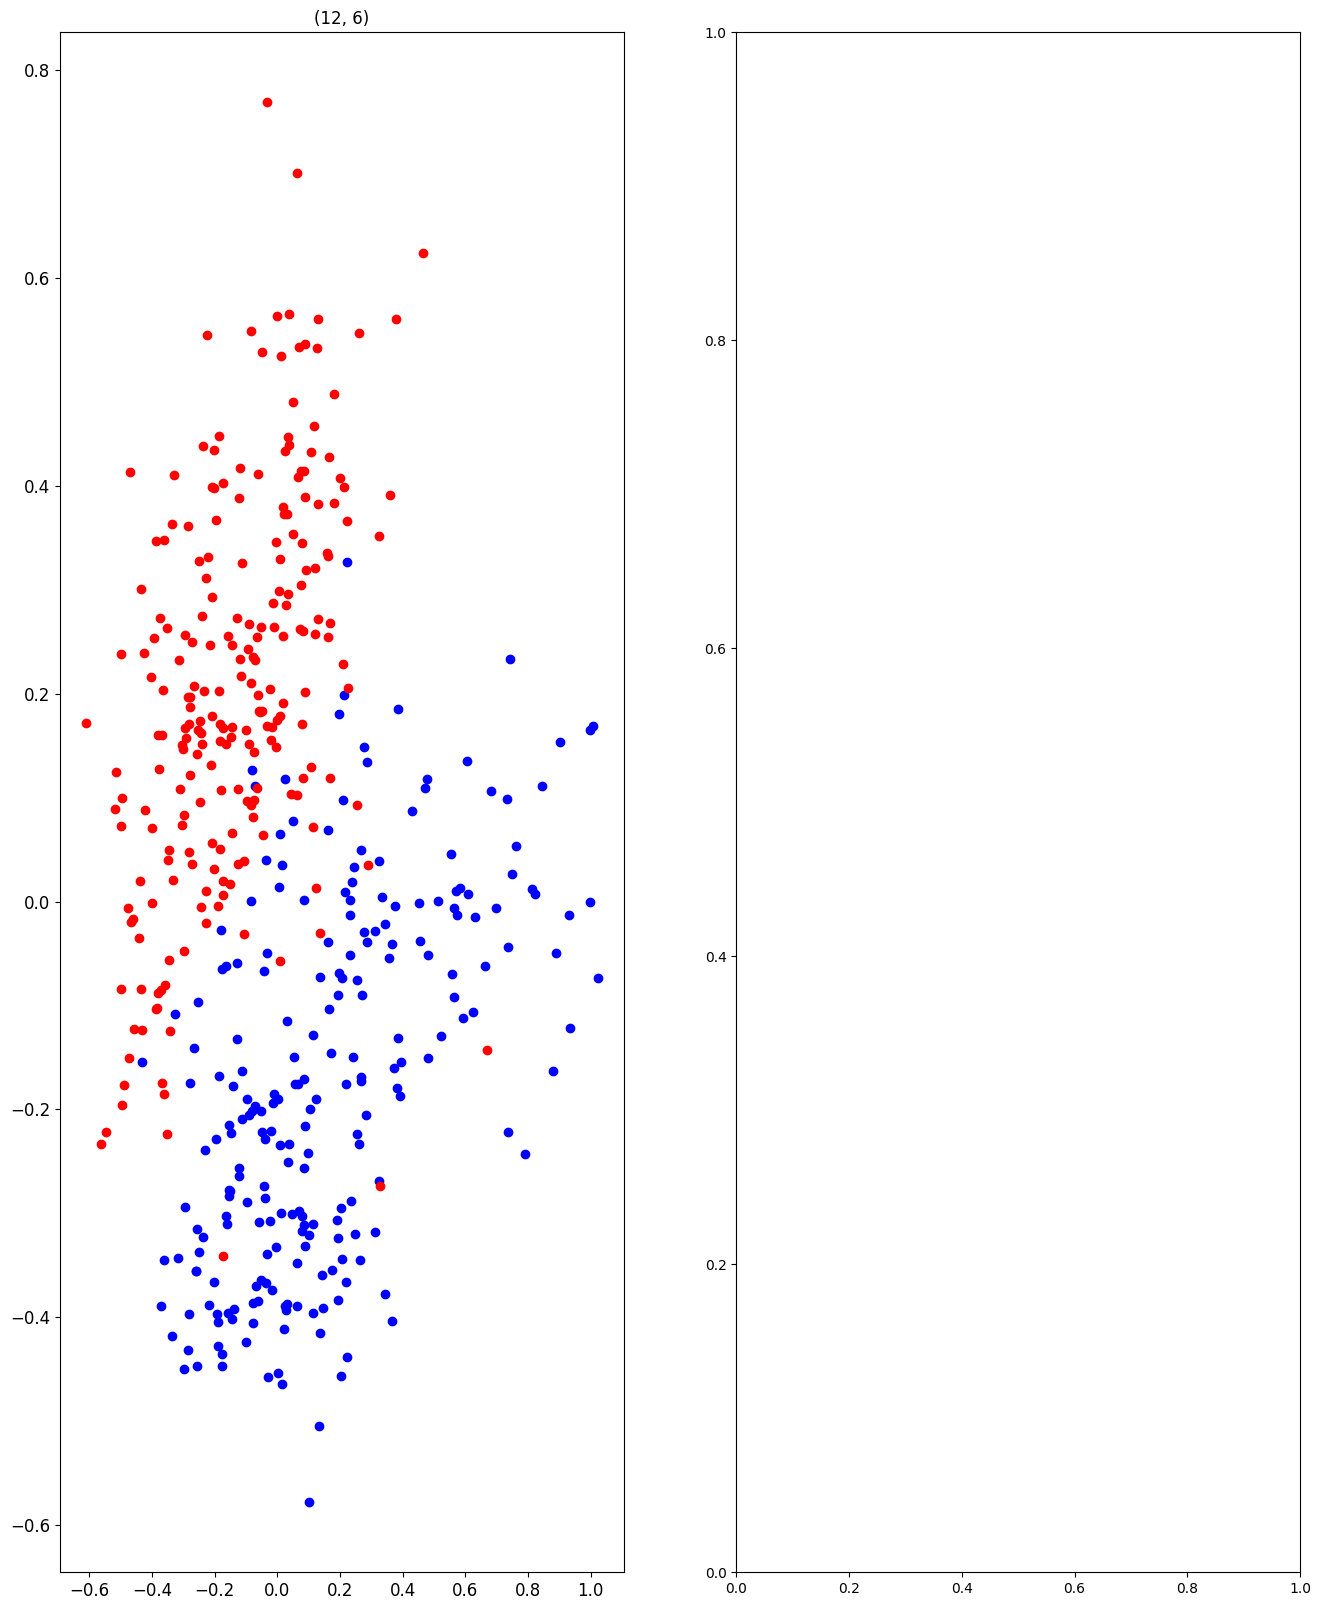

In [35]:
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#heads = [(2,5), (3,9), (7,24), (10,23), (13,0), (13,11),(14,0), (15,5), (15,6), (15,7), (17,10),(17,20), (31,14), (17, 23)]#,# (3,14)]#(11,8), (8,24), (7,24)]
#heads = [(13,0), (13, 11),(15,5), (15,6), (15,7), (11,17), (31,20), (31,14), (31,7)] #(3,4), (17, 11), (9,10) ,  (17,22) , (16,8),
#heads = [(13, 0), (13, 8), (13, 11), (0, 31), (1, 0), (3, 9), (7, 24), (10, 23), (15, 2), (17, 23), (28, 8), (30, 0), (31, 13), (31, 14), (31, 28), (31, 30)]
#heads = [(5, i) for i in range(0,32)]
#for head in heads:


"""true	false	alpha	layer	head
113	43	7	35	11	16
130	43	7	35	12	1
171	46	4	35	13	10"""

#heads = [(10,29), (12,19), (13,0), (14,3), (14,20), (14,21), (14,27)]

#heads = [(11,16), (12,1), (13,10)]
#heads = [(12,0), (13,9), (13,16), (14,0), (14,18)]

heads=[(12,6)]
## 14 0 14 10 15 5 15 6 15 7 16 6 17 20
n_rows = len(heads) // 2 + 1
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(16, 20))

for id, head in enumerate(heads):

    ax = fig.axes[id] 
    ax.set_title(str(head))
    layer = head[0]
    h = head[1]
    all_X_train = np.concatenate([separated_activations[i] for i in train_set_idxs], axis = 0)
    #print(all_X_train.shape)
    all_X_val = np.concatenate([separated_activations[i] for i in val_set_idxs], axis = 0)
    y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
    #print(y_train.shape)
    y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)
            
    X_train = all_X_train[:,layer,h,:]
    X_train.shape

    X_val = all_X_val[:,layer,h,:]
    X_val.shape

    # # Standardizing the data
    # scaler = StandardScaler()
    # scaler = scaler.fit(X_train)
    # X_train = scaler.transform(X_train)
    # X_val = scaler.transform(X_val)


    # # Filtering for outliers
    # X_val, y_val = remove_outliers(X_train, X_val, y_val)
    # X_train, y_train = remove_outliers(X_train, X_train, y_train)

    #cl = TSNE(n_components=2, random_state=args.seed).fit(X_train)
    cl = PCA(n_components=2, random_state=args.seed).fit(X_train)
    X_reduction = cl.transform(X_train)
    X_val_reduction = cl.transform(X_val)
    
    indexes_val = np.where(y_val == True)[0]
    samples_1 = [X_val_reduction[i] for i in indexes_val]

    indexes_val = np.where(y_val == False)[0]
    samples_2 = [X_val_reduction[i] for i in indexes_val]

    # indexes_val = np.where(y_train == True)[0]
    # samples_1 = [X_reduction[i] for i in indexes_val]

    # indexes_val = np.where(y_train == False)[0]
    # samples_2 = [X_reduction[i] for i in indexes_val]
    print(str(head))
    #print(calculate_snr(samples_1, samples_2))
    pca = cl

    explained_variance_ratio = pca.explained_variance_ratio_
    print("Explained Variance Ratio:", explained_variance_ratio)

    for label, color in zip([True, False], ['blue', 'red']):

        #color = ['blue', 'red']
        #    ax.scatter(X_reduction[:,0], X_reduction[:,1], c=color[0])#, label=str(label))

        #ax.scatter(X_val_reduction[:,0], X_val_reduction[:,1], c=color[1])
        #indexes_train = np.where(y_train == label)[0]
        indexes_val = np.where(y_val == label)[0]
            #indexes = np.concatenate([indexes_train, indexes_val])
        
        samples = [X_val_reduction[i] for i in indexes_val]

        for idx in indexes_val:
            #for i, idx in enumerate(df_reduced[indices_to_keep].index):
                #if idx in df_reduced[df_reduced['req_id'].isin(filt)].index :
                #ax.text(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1], str(idx))
                            #print(idx)
                #if idx in df_reduced[true_false].index:
            #ax.scatter(X_reduction[idx,0], X_reduction[idx, 1], c=color, label=str(idx))
            ax.scatter(X_val_reduction[idx,0], X_val_reduction[idx, 1], c=color, label=str(idx))
            #ax.scatter(X_reduction[idx,0], 1, c=color, label=str(idx))
            #ax.hist(X_reduction[idx,0], bins=35, color=color, alpha=0.4, label=str(idx))  # Histogram
    # Adjusting tick label font sizes using tick_params
    ax.tick_params(axis='x', labelsize=12)  # Adjust font size for x-axis tick labels
    ax.tick_params(axis='y', labelsize=12)  # Adjust font size for y-axis tick labels
    
                     

Explained Variance Ratio: [0.58812263 0.10863558 0.05777175]
Explained Variance Ratio: [0.26634068 0.09057856 0.07258933]
Explained Variance Ratio: [0.24850748 0.15013512 0.11631916]


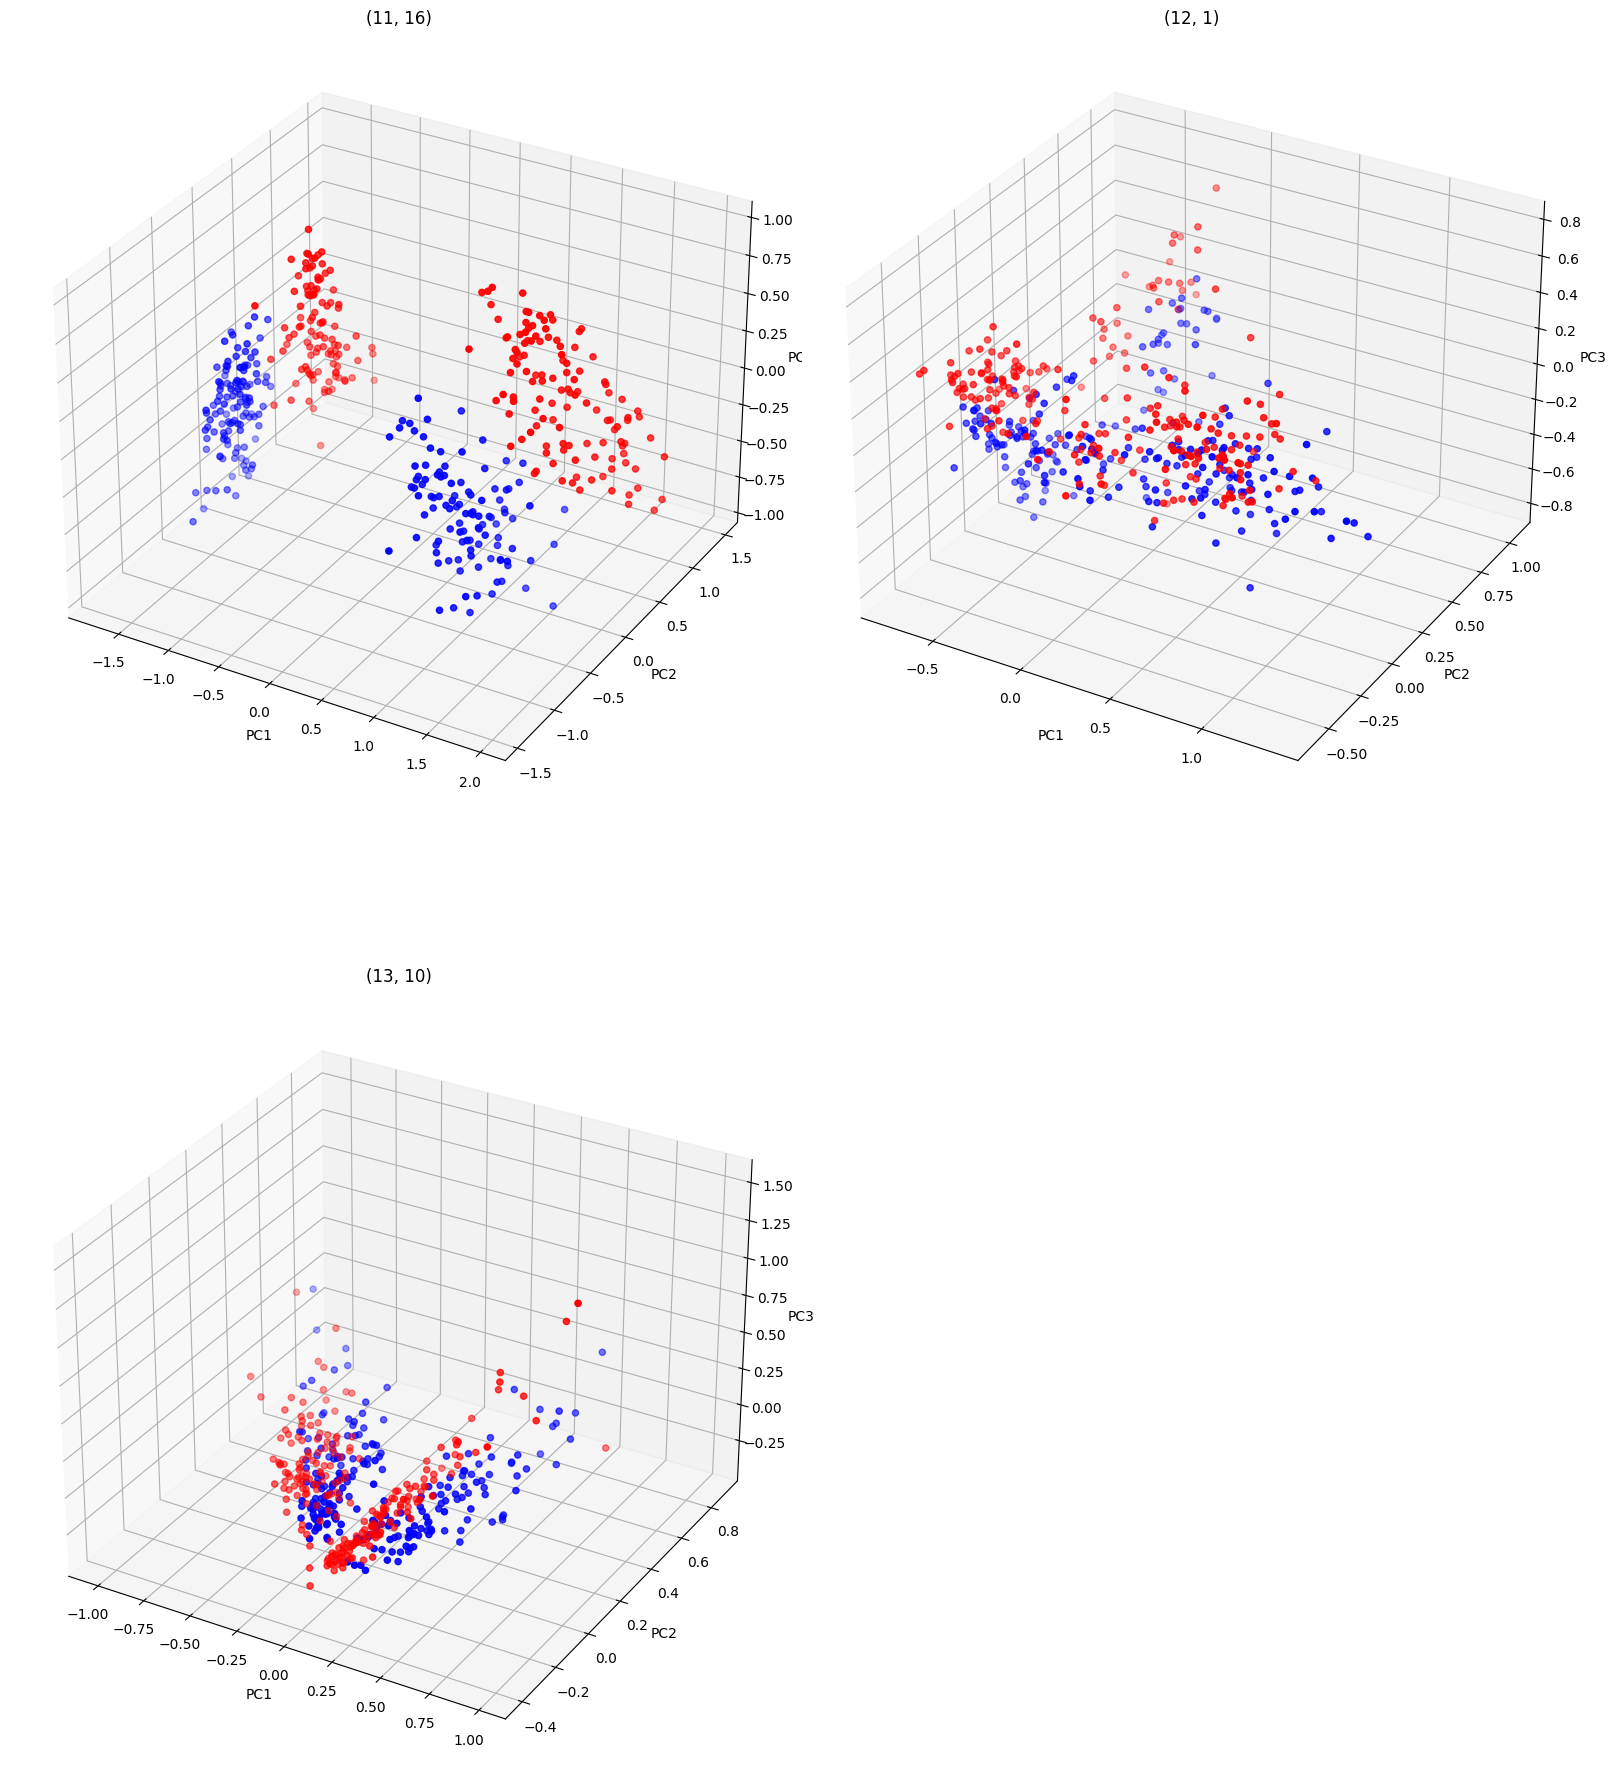

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


heads = [(3,9), (9,9), (10,14), (13,0), (13, 11),(15,5), (15,6), (15,7), (11,17), (31,20), (31,14), (31,7)] #(3,4), (17, 11), (9,10) ,  (17,22) , (16,8),
heads = [(11,16), (12,1), (13,10)]

# Modify your plotting loop to create 3D plots
n_rows = len(heads) // 2 + 1
fig = plt.figure(figsize=(16, 20))

all_X_train = np.concatenate([separated_activations[i] for i in train_set_idxs], axis = 0)
#print(all_X_train.shape)
all_X_val = np.concatenate([separated_activations[i] for i in val_set_idxs], axis = 0)
y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
#print(y_train.shape)
y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)


for id, head in enumerate(heads):
    # Create a 3D subplot
    ax = fig.add_subplot(n_rows, 2, id + 1, projection='3d')
    ax.set_title(str(head))
    layer = head[0]
    h = head[1]
    
    X_train = all_X_train[:, layer, h, :]
    X_val = all_X_val[:, layer, h, :]

    # Using PCA for 3D dimensionality reduction
    pca = PCA(n_components=3, random_state=42)  # Adjust the random_state as per your setup
    pca.fit(X_train)
    

    explained_variance_ratio = pca.explained_variance_ratio_
    print("Explained Variance Ratio:", explained_variance_ratio)

    X_train_pca = pca.transform(X_train)
    X_val_pca = pca.transform(X_val)
    
    # Splitting the validation set based on the labels
    indexes_val_true = np.where(y_val == True)[0]
    indexes_val_false = np.where(y_val == False)[0]
    
    samples_true = X_val_pca[indexes_val_true]
    samples_false = X_val_pca[indexes_val_false]

    # Plotting
    ax.scatter(samples_true[:, 0], samples_true[:, 1], samples_true[:, 2], c='blue', label='True')
    ax.scatter(samples_false[:, 0], samples_false[:, 1], samples_false[:, 2], c='red', label='False')

    # Set labels for axes
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    
    # Adjust tick label size (optional)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

In [ ]:
ratios = []
separated_head_wise_activations = separated_activations


all_X_train = np.concatenate([separated_head_wise_activations[i] for i in train_set_idxs], axis = 0)
print(all_X_train.shape)
all_X_val = np.concatenate([separated_head_wise_activations[i] for i in val_set_idxs], axis = 0)
y_train = np.concatenate([separated_labels[i] for i in train_set_idxs], axis = 0)
print(y_train.shape)
y_val = np.concatenate([separated_labels[i] for i in val_set_idxs], axis = 0)

for layer in tqdm(range(num_layers)): 
        for h in range(num_heads): 
                
                label =1
                indexes_yes = np.where(y_train == label)[0]
                ##indexes_val = np.where(y_val == 1)[0]
                #indexes = np.concatenate([indexes_train, indexes_val])

                
                ## needs to be split
                set1 = all_X_train[indexes_yes,layer,h,:]
                
                label =0
                indexes_no = np.where(y_train == label)[0]
                set2 = all_X_train[indexes_no,layer,h,:]

                # Assuming set1 and set2 are your two classes of data
                mean1 = np.mean(set1, axis=0)
                mean2 = np.mean(set2, axis=0)

                # Between-class variance (squared difference between class means)
                between_class_variance = np.sum((mean1 - mean2) ** 2)

                # Within-class variances (average variance within each class)
                within_class_variance = (np.var(set1, axis=0).mean() + np.var(set2, axis=0).mean()) / 2

                # Ratio similar to Fisher's criterion but without projection
                ratio = between_class_variance / within_class_variance

                ratios.append(ratio)

ratios = np.array(ratios)

In [ ]:
 ## needs to be split
# set1 = all_X_train[indexes_yes,layer,h,:]

# label =0
# indexes_no = np.where(y_train == label)[0]
# set2 = all_X_train[indexes_no,layer,h,:]

layer = 3
h = 9

X_train = all_X_train[:,layer,h,:]
X_train.shape

X_val = all_X_val[:,layer,h,:]
X_val.shape

#cl = TSNE(n_components=2, random_state=args.seed).fit(X_train)
cl = PCA(n_components=2, random_state=args.seed).fit(X_train)
X_reduction = cl.transform(X_train)
X_val_reduction = cl.transform(X_val)


indexes_val = np.where(y_val == True)[0]
samples_1 = [X_val_reduction[i] for i in indexes_val]

indexes_val = np.where(y_val == False)[0]
samples_2 = [X_val_reduction[i] for i in indexes_val]

set1 = samples_1
set2 = samples_2

# Assuming set1 and set2 are your two classes of data
mean1 = np.mean(set1, axis=0)
mean2 = np.mean(set2, axis=0)

print("Mean True", mean1)
print("Mean False", mean2)

print("Variance True", np.var(set1, axis=0).mean())
print("Variance False", np.var(set2, axis=0).mean())

print("Summed_ Variance:",np.var(set1, axis=0).mean() + np.var(set2, axis=0).mean())

# Between-class variance (squared difference between class means)
between_class_variance = np.sum((mean1 - mean2) ** 2)

# Within-class variances (average variance within each class)
within_class_variance = (np.var(set1, axis=0).mean() + np.var(set2, axis=0).mean()) / 2

# Ratio similar to Fisher's criterion but without projection
ratio = between_class_variance / within_class_variance#
print("Ratio", ratio)